# Programming Exercise 6: Support Vector Machines

```
by Seokkyu Kong
Date: 2016-04-05
Summary: Coursera machine learning (Prof. Andrew Ng) 강의 내용과 assignment는 octave(matlab)으로 이루어진다. 
해당 코드를 python으로 구현해본다.

Andrew Ng 교수의 강의: https://www.coursera.org/learn/machine-learning/
```

Numpy 와 MATLAB 참고 자료

- [Numpy for Matlab users #1](https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html)
- [NumPy for MATLAB users #2](http://mathesaurus.sourceforge.net/matlab-numpy.html)

## Introduction 

이번 연습문제에서는, support vector machines 지지 벡터 머신 (SVMs) 를 사용해서 스팸 분류기를 구축한다. 

### Files included in this exercise

연습문제를 통해서, 당신은 스크립트 ex6.m을 사용할 것이다. 이들 스크립트는 문제에 대한 데이터셋을 설정하고 당신이 작성할 함수를 호출하게 된다. 당신은 다른 파일들에 있는 함수들만 수정하기를 요구된다. 이 과제에 있는 지시사항을 따라라.


## 1. Support Vector Machines

연습문제 전반부에서, 다양한 example 2D datasets을 가지고 지지 벡터 머신을 사용한다. **이들 데이터셋으로 실험하는 것은 SVM이 어떻게 동작하는지와 SVMs에 가우시안 커널을 어떻게 사용하는지에 대한 직관을 얻는데** 도움이 될 것이다. 연습문제 후반부에서는 스팸 분류기를 구축하기 위해서 지지 벡터 머신을 사용할 것이다. 

### 1.1 Example Dataset 1

우리는 2D example dataset으로 시작하는데, linear boundary로 분리될 수 있다. 스크립트 ex6.m 은 training data를 plot한다. (그림 1) **이 데이터넷에서, positive examples(+로 표시됨)의 위치와 negative exampels(o로 표시됨)의 위치는 gap에 의해서 표시된 자연스런 구분을 제시한다.** 그런데, **왼쪽 끝에 (0.1, 4.1) 위치에서 이상치 positive example + 가 있음을** 주목해라. 이 연습문제의 일부분으로, 이 **이상치가 SVM decision boundary에 어떻게 영향을 주는지** 보게 될 것이다.

[Figure 1: Example Dataset 1]

연습문제 이 부분에서, SVMs에 서로 다른 C 값을 사용하게 될 것이다. 비공식적으로, __파라미터 C는 잘못 분류된 traininig examples에 대한 penalty를 제어하는 양의 값이다. 값이 큰 C 파라미터는 SVM이 모든 examples를 올바르게 분류하도록 시킨다. C는 $ \frac{1}{\lambda} $ 와 유사한 역할을 하는데, lambda는 logistic regression을 위해서 이전에 사용했던 regularization 파라미터이다.__

[Figure 2: SVM Decision Boundary with C = 1 (Example Dataset 1)]

[Figure 3: SVM Decision Boundary with C = 100 (Example Dataset 1)]

ex6.m의 다음 부분에서 SVM 소프트웨어를 이용해서 (C = 1)로 SVM을 훈련시키는데, 우리는 시작하는 코드로 svmTrain.m 을 포함시켰다. 

(각주 2: Octave/MATLAB과의 호환성을 보장하기 위해서, 우리는 SVM learning 알고리즘의 구현을 포함했다. 하지만, 이 특별한 구현은 호환성을 최대화 하기 위해서 선택되었기 때문에, 매우 효율적이지는 않다. **만약 당신이 실제 문제에 대해 SVM을 training 한다면, 특별히 만약 당신이 더 큰 데이터넷에 확장할 필요가 있다면, 우리는 LIBSVM과 같은 매우 최적화된 SVM 툴박스를 대신 사용할 것을 강력히 권장한다.**)

**C  = 1 일때, SVM은 두 개의 데이터셋 사이에 있는 gap 에 decision boundary를 놓는데 왼쪽 구성에 있는 데이터 포인트는 _잘못 분류하고_ 있음을** 볼 수 있다. (그림 2)


Implementation Note: 대부분의 SVM 소프트웨어 패키지들은 (svmTrain.m을 포함해서) 자동적으로 추가적인 feature x0 = 1을 추가한다. 그리고 자동적으로 절편 항목 theta0를 학습하는데 신경을 쓴다. 그래서 **traininig data를 SVM 소프트웨어에 전달할 때, 추가 feature인 x0 = 1을 추가할 필요가 없다.** 특히, Octave/MATLAB 에서 코드는 traininig examples $ x \in \mathbb{R}^{n} $ 에서 동작해야 한다. ($ x \in \mathbb{R}^{n+1} $ 이 아니다); 예를 들어 첫번째 exmaple dataset은 $ x \in \mathbb{R}^{2} $ 이다.


당신의 작업은 이 데이터넷 상에서 서로 다른 C 값을 시도해보는 것이다. 특히, 스크립트 내의 C 값을 C = 100으로 하고 SVM training을 다시 실행해 봐라. **C = 100 일때, SVM은 이제 각각의 단일 example을 올바르게 분류하지만, decision boundary는 데이터에 대해서 자연스럽게 맞지 않음을 볼 수 있어야 한다.** (역주: 즉 overfitting 상태이다)


### 1.2 SVM with Gaussian Kernels

연습문제의 이 부분에서, **당신은 non-linear classification을 수행하는 SVMs를 사용하게 된다.** 특히, 가우시안 커널을 가진 SVMs을 선형으로 분리될 수 없는 데이터셋 상에 사용할 것이다.

#### 1.2.1 Gaussian Kernel

SVM으로 non-linear decision boundaries를 찾기 위해서는, 우리는 먼저 Gaussian kernel을 구현할 필요가 있다. 당신은 __가우시안 커널을 한 쌍의 examples, $ ( x^{(i)}, x^{(j)} ) $ 사이에 "distance"를 측정하는 유사도 함수로 생각할 수 있다.__

__가우시안 커널은 또한 bandwidth 파라미터 sigma로 파라미터화 할 수 있는데 그것은 examples가 멀리 떨어짐에 따라 얼마나 빨리 유사도 메트릭이 감소되는지 (0으로) 결정하는 값이다.__

당신은 이제 **gaussianKernel.m 을 완성해서 2개의 examples $ (x^{(i)}, x^{(j)}) $ 사이의 Gaussian kernel을 계산해야 한다.** 가우시안 커널 함수는 다음처럼 정의 된다.

[수식]

일단, gaussianKernel.m 함수를 완성하면, 스크립트 ex6.m은 커널 함수를 2개의 제공된 examples에 테스트 하는데 0.324652 값을 기대해야 한다.


_You should now submit your solutions._


In [1]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

Populating the interactive namespace from numpy and matplotlib


In [2]:
def plotData(X, y):
    """
    새로운 figure로 x와 y 데이터 포인트를 plot 한다.
    이 함수는 데이터 포인트를 positive examples에 대해서 + 로 negative 
    examples에 대해서는 o로 plot 한다. X는 Mx2 행렬로 가정한다.
    
    Note: 이것은 다소간 y = 1 또는 y = 0임을 기대하게끔 수정되었다.
    """
    
    # positive 와 negative examples의 인덱스를 찾는다.
    # *******************************************************************
    # XXX: 논리값 비교 시 아래와 같이 사용하지 않는다. nonzero()를 사용한다.
    # pos = (y == 1)
    # neg = (y == 0)
    # *******************************************************************
    
    # OK
    #pos = nonzero(y == 1) # Admitted
    #neg = nonzero(y == 0)
    
    # OK
    pos = (y == 1)
    neg = (y == 0)

    plt.plot(X[pos, 0], X[pos, 1], 'k+', label='Admitted')
    plt.plot(X[neg, 0], X[neg, 1], 'ko', color='y', label='Not admitted')


Loading and Visualizing Data ...


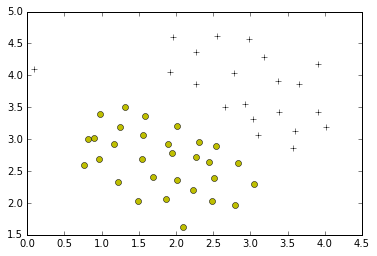

In [3]:
# 코드 작성
## =============== Part 1: Loading and Visualizing Data ================
# 우리는 데이터셋을 먼저 로딩하고 가시화함으로써 연습문제를 시작한다.
# 다음 코드는 데이터셋을 로드하고 데이터를 plot 할 것이다.

print('Loading and Visualizing Data ...')

# Load from ex6data1:
# X, y를 로드한다.
mat_content = sio.loadmat('ex6data1.mat')

# X: 51x2, y: 51
X = mat_content['X']
y = mat_content['y']
y = y.flatten()

plotData(X, y)


Training Linear SVM ...


/Users/skkong/anaconda/lib/python3.5/site-packages/sklearn/svm/base.py:224: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


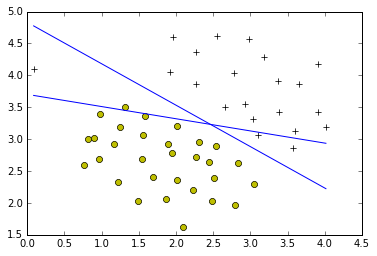

In [4]:
## ==================== Part 2: Training Linear SVM ====================
# 다음 코드는 dataset 상에서 선형 SVM을 데이터셋 상에 훈련시킨다. 
# 그리고 학습된 의사결정 경계선을 그린다.

def visualizeBoundaryLinear(X, y, model):
    """
    SVM에 의해 학습된 선형 의사결정 경계선을 plot 한다.
    
    이 함수는 SVM에 의해 학습된 선형 의사결정 경계선을 그리고 
    데이터 상에 겹쳐 쓴다.
    """
    
    w = model.coef_.flatten() # 모델의 계수(가중치)
    b = model.intercept_.flatten() # 모델의 절편
    xp = linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    # theta0 * x + theta1 * y + b = 0
    yp = - (w[0] * xp + b) / w[1]
    plotData(X, y)
    plot(xp, yp, '-b')
    
from sklearn import svm

# Load from ex6data1:
# X, y를 로드한다.
mat_content = sio.loadmat('ex6data1.mat')

# X: 51x2, y: 51
X = mat_content['X']
y = mat_content['y']
y = y.ravel()

print('Training Linear SVM ...')

# 아래 C 값을 변경해보고 의사결정 경계선이 어떻게 달라지는지 살펴보라.
# (예를 들어, C = 1000)
# **************************************************************
# XXX: svmTrain.m은 구현하는 것을 생략하고 sklearn의 svm을 사용한다.
# **************************************************************
# model = svmTrain(X, y, C, @linearKernel, 1e-3, 20); In Octave/MATLAB

C = 1
clf = svm.SVC(C=C, kernel='linear', tol=1e-3, max_iter=20)
model = clf.fit(X, y)

visualizeBoundaryLinear(X, y, model)

# C = 1000 일때, 
C = 1000
clf = svm.SVC(C=C, kernel='linear', tol=1e-3, max_iter=20)
model = clf.fit(X, y)

visualizeBoundaryLinear(X, y, model)

# *****************************************************
# XXX: C 파라미터의 의미는 다음과 같다. C = 1/lambda
# 큰 C: lambda가 작으므로 lower bias, high variance
# 작은 C: lambda가 크므로, higher bias, low variance
# *****************************************************


In [5]:
## =============== Part 3: Implementing Gaussian Kernel ===============
# SVM과 함께 사용할 가우시안 커널을 구현한다. gaussianKernel.m 내의 코드를 완성해야 한다.

def gaussianKernel(X1, X2, sigma):
    """    
    X1과 X2 사이의 radial basis function kernel을 반환한다.

    # ***********************************************************************
    XXX: 커널 함수의 특징은 다음과 같다.
    1) 커널 함수는 2점 사이의 유사도를 계산한다. 
    2) 2 점의 거리가 가까이 있으면 1에 가깝고, 멀리 있으면 0에 가까운 값이 계산된다.
    3) sigma가 클 수록 완만한 경사를 이룬다.
    4) 큰 sigma: feature fi가 천천히 변화한다. higher bias, lower variance
       작은 sigma: lower bias, higher variance
    # ***********************************************************************
    """
    
    # X1과 X2가 컬럼 벡터임을 보증한다.
    X1 = X1.flatten()
    X2 = X2.flatten()
    
    # 다음 변수를 올바르게 반환해야 한다.
    sim = 0
    
    # ====================== YOUR CODE HERE ======================
    # 지시사항: sigma의 bandwidth를 가진 가우시안 커널을 이용해서 
    # 계산된 x1과 x2 사이의 유사도를 반환하도록 이 함수를 작성해라.
    #
    sim = np.exp(-1 * np.sum((X1 - X2) ** 2) / (2 * sigma ** 2))
    
    return sim

print('Evaluating the Gaussian Kernel ...')

X1 = np.array([1, 2, 1])
X2 = np.array([0, 4, -1])
sigma = 2

sim = gaussianKernel(X1, X2, sigma)

print('Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = %0.5f :' % sigma)
print('\t%f\n(this value should be about 0.324652)' % sim)

Evaluating the Gaussian Kernel ...
Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 2.00000 :
	0.324652
(this value should be about 0.324652)


#### 1.2.2 Example Dataset 2

[Figure 4: Example Dataset 2]

ex6.m의 다음 부분은 dataset 2를 load하고 plot 할 것이다. (그림 4) 이 그림에서, 당신은 이 데이터셋에 대한 positive와 negative examples를 분리하는 **linear boundary가 없음을** 볼 수 있다. 어쨌든, S**VM과 함께 가우시안 커널을 이용해서 데이터셋에 합리적으로 잘 성능을 낼 수 있는 비선형 decision boundary를 학습할 수 있게 된다.**

만약 가우시안 함수를 올바르게 구현했다면, ex6.m은 이 데이터셋 상에서 가우시안 커널을 가진 SVM을 훈련시키게 된다.

[Figure 5: SVM (Gaussian Kernel) Decision Boundary (Example Dataset 2)]

그림 5는 가우시안 커널을 가진 SVM에 의해 발견된 decision boundary를 보여준다. decision boundary는 대부분의 positive와 negative examples를 올바르게 분리할 수 있고 데이터셋의 contours에 잘 따른다.


Loading and Visualizing Data ...


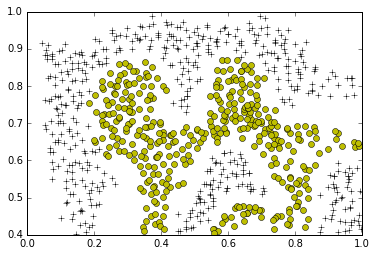

In [6]:

## =============== Part 4: Visualizing Dataset 2 ================
# 다음 코드는 다음번 데이터셋을 로드하고 plot한다.

print('Loading and Visualizing Data ...')

# ex6data2를 로드한다.
mat_content = sio.loadmat('ex6data2.mat')
X = mat_content['X'] # 863x2
y = mat_content['y'].flatten() # 863,

# 트레이닝 데이트를 plot한다.
plotData(X, y)


In [8]:
## ========== Part 5: Training SVM with RBF Kernel (Dataset 2) ==========
# 커널을 구현한 이후에, SVM 분류기를 훈련하기 위해서 그것을 사용할 수 있다.

def visualizeBoundary(X, y, model):
    """
    SVM에 의해 학습된 비선형 의사결정 경계선을 그린다.
    이 함수는 SVM에 의해 학습된 비선형 의사결정 경계선을 그리고 그것 위에
    데이터를 겹쳐 그린다.
    """
    
    # training data를 그린다.
    plotData(X, y)
    
    # grid 값에 대한 분류 예측을 생성한다.
    x1plot = linspace(min(X[:, 0]), max(X[:, 0]), 100).T # 100,
    x2plot = linspace(min(X[:, 1]), max(X[:, 1]), 100).T # 100,
    X1, X2 = meshgrid(x1plot, x2plot)

    #print(X1.shape) # X1: 100x100
    vals = np.zeros(X1.shape) # 100x100
    
    # 100개 단위로 계산
    for i in np.arange(X1.shape[1]):
        this_X = np.column_stack((X1[:, i], X2[:, i])) # 100x2
        vals[:, i] = model.predict(this_X)
        
    # SVM 경계선을 plot 한다.
    plt.contour(X1, X2, vals, levels = [0.0])

# 위의 함수는 연습문제처럼 100개씩 처리한다.
# 아래 함수는 벡터화 시켜서 predict()를 호출한다. 인터넷 참조
def visualizeBoundary2(X, y, model):
    """
    x1plot = linspace(min(X(:,1)), max(X(:,1)), 100)';
    x2plot = linspace(min(X(:,2)), max(X(:,2)), 100)';
    [X1, X2] = meshgrid(x1plot, x2plot);

    XXX: linspace(1, 10, 5): 1에서 10 사이에 5개의 포인트 생성함, Octave, python 사용법 동일함
    array([  1.  ,   3.25,   5.5 ,   7.75,  10.  ])
    
    XXX: np.arange(0, 1, 0.2): 0에서 1까지 0.2 씩 증가, 1을 포함하지 않음
    array([ 0. ,  0.2,  0.4,  0.6,  0.8])
    
    
    np.arange(-20, 0, 3)
    array([-20, -17, -14, -11,  -8,  -5,  -2]
    
    octave:7> (-20:3:0)
    ans =

      -20  -17  -14  -11   -8   -5   -2
      
    
    octave:1> meshgrid(0:1:5)
    ans =

       0   1   2   3   4   5
       0   1   2   3   4   5
       0   1   2   3   4   5
       0   1   2   3   4   5
       0   1   2   3   4   5
       0   1   2   3   4   5
    """
    
    # Do a bunch of predictions on points
    x1, x2 = numpy.meshgrid(numpy.arange(0, 1, 0.01), numpy.arange(0.4, 1, 0.01))
    # 컬럼 축으로 묶는다.
    Z = model.predict(numpy.column_stack((x1.ravel(), x2.ravel())))
    Z = Z.reshape(x1.shape)
    
    # ******************************************************************
    # XXX: ravel(): 원본의 view를 반환함. flatten() 원본의 copy를 반환함
    # ******************************************************************

    # Plot the original data and our predictions as a contour
    # OK
    plotData(X, y)
    plt.contour(x1, x2, Z, colors='k', levels=[0])


print('Training SVM with RBF Kernel (this may take 1 to 2 minutes) ...')

# ex6data2를 로드한다.
mat_content = sio.loadmat('ex6data2.mat')
X = mat_content['X'] # 863x2
y = mat_content['y'].flatten() # 863,


# 우리는 tolerance와 max_passes 를 낮게 설정해서 코드가 빠르게 실행되도록 한다.
# 어쨌든, 당신은 실무에서 training이 수렴되도록 원할 것이다.
#model = svmTrain(X, y, C, @(X1, X2) gaussianKernel(x1, x2, sigma))
# *********************************************************************************
# XXX: svm의 몇가지 기억할만한 점
# XXX: 1) rbf 커널은 연습문제처럼 sklearn.svm이 가우시안 커널을 호출하는 것과 같다.
# XXX: 2) sigma 대신에 sklearn은 gamma를 가진 rbf를 파라미터화 한다. gamma = 0.5/sigma**2
# XXX: 3) max_iter = 20일때는 엉뚱한 분류가 이루어진다. 기본인 -1이거나 200으로
# 설정해야 연습문제의 그림 5와 같아진다.
# *********************************************************************************
# SVM 파라미터
C = 1; sigma = 0.1

gamma = 1.0 / (2.0 * sigma ** 2) # gamma = 50

# 연습문제와 달리, svm 패키지의 rbf 커널을 사용한다.
clf = svm.SVC(C=C, kernel='rbf', tol=1e-3, max_iter=200, gamma = gamma)
model = clf.fit(X, y)

print(model)


visualizeBoundary(X, y, model)
#visualizeBoundary2(X, y, model)

library(kernlab)
m <- ksvm(y ~ X, kernel = "vanilladot")

SyntaxError: invalid syntax (<ipython-input-8-54fe358acff0>, line 115)

In [23]:
"""
In Octave/MATLAB 의 model 출력물

model =

  scalar structure containing the fields:

    X =

       0.750000   0.791667
       0.761521   0.765351
       0.233871   0.861842
       0.215438   0.858918

    y =

       1
       1
       1
       1
@(x1, x2) gaussianKernel (x1, x2, sigma)

    b =  0.39687
    alphas =

       1.0000e+00
       1.0000e+00
       1.0000e+00
       9.1961e-01
       3.4694e-18
       1.3878e-17
       1.0000e+00
    w =

      -0.54240
       1.55583       
"""
print()

In [24]:
# test code
u = linspace(0, 1, 10) # 10,
v = linspace(0, 1, 10) # 10,
        
z = np.zeros((np.size(u), np.size(v)))

a, b = np.meshgrid(u, v)


#### 1.2.3 Example Dataset 3

연습문제 이 부분에서, 당신은 가우시안 커널을 가진 SVM을 어떻게 사용하는지에 대한 실질적인 skill을 얻게 된다. ex6.m의 다음 부분은 3번째 데이터셋 (그림 6) 을 load하고 보여준다. 당신은 이 데이터셋과 함께 가우시안 커널을 가진 SVM을 사용할 것이다.

제공된 데이터셋에서, ex6data3.mat, 변수 X, y, Xval, yval이 주어진다. ex6.m의 제공된 코드는 SVM 분류기를 훈련시키는데 training set (X, y)를 사용하고 dataset3Params.m 에서 로딩된 파라미터를 사용한다.

당신은 작업은 **cross validation set Xval, yval을 사용해서 최적의 C와 sigma 파라미터를 결정하는** 것이다. 파라미터 C와 sigma를 찾기 위해 도움이 되는 부가적인 코드를 작성해야 한다. __C와 sigma 둘 모두, 우리는 배수적인 단계로 값들을 사용할 것을 제안한다. (예를 들어, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30). 당신은 C와 sigma에 대해 모든 가능한 쌍을 시도해야 한다.__ (예를 들어, C = 0.3 그리고 sigma = 0.1) 예를 들어, C와 sigma^2 에 대해서 위에 목록화된 8개 각각을 시도한다면, (cross validation set 상에서) 결국 전체 8^2 = 64 개의 서로 다른 모델을 훈련하고 평가하게 되고 만다.

best C와 sigma 파라미터를 결정한 후에, dataset3Params.m 내의 코드를 수정해서 당신이 찾은 가장 좋은 파라미터로 채워야 한다. 우리의 가장 좋은 파라미터에 대해서, SVM은 그림 7에서 보여진 것과 같이 decision boundary를 반환한다.

[Figure 6: Example Dataset 3]

[Figure 7: SVM (Gaussian Kernal) Decision Boundary (Example Dataset 3)]


Implementation Tip: **최적의 C와 sigma 파라미터를 선택하기 위해 cross validation 을 구현할 때, cross validation set 상에서 error을 평가할 필요가 있다.** 분류에 대해서, **error는 올바르게 분류되지 않은 cross validation examples의 비율로 정의됨을** 기억해라. Octave/MATLAB 에서, mean(double(predictions ~= yval))로 계산할 수 있다. predictions는 SVM으로 부터 모든 예측값을 포함하는 벡터이다. 그리고 yval은 cross validation set에서 나온 true label 값이다. cross validtion set 에 대해서 예측값을 생성하는 svmPredict 함수를 사용할 수 있다.


_You should now submit your solutions._

Loading and Visualizing Data ...


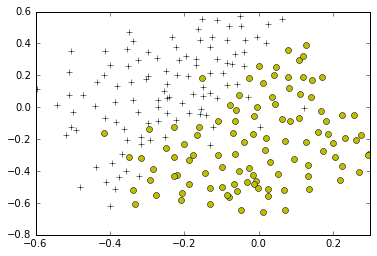

In [25]:
##  =============== Part 6: Visualizing Dataset 3 ================
# 다음 코드는 다음 단계의 데이터셋을 로드하고 plot 할 것이다.

print('Loading and Visualizing Data ...')

# ex6data3를 로드한다.
mat_content = sio.loadmat('ex6data3.mat')
X = mat_content['X']
y = mat_content['y']
y = y.ravel()

Xval = mat_content['Xval']
yval = mat_content['yval']
yval = yval.ravel()

# training data를 plot한다.
plotData(X, y)

C = 1.0, sigma = 0.1
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=49.999999999999993,
  kernel='rbf', max_iter=200, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


C:\Users\skkong\Anaconda3\lib\site-packages\sklearn\svm\base.py:224: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


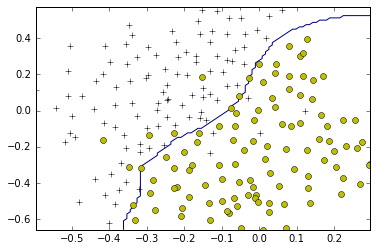

In [26]:
## ========== Part 7: Training SVM with RBF Kernel (Dataset 3) ==========
# 이것은 당신이 실험할 수 있는 서로 다른 데이터셋이다. C와 sigma를 여기서
# 서로 다른 값으로 변경해 보아라.

# TODO

def dataset3Params(X, y, Xval, yval):
    """
    연습문제 Part 3에 대한 C와 sigma의 선택값을 반환한다.
    
    이 함수를 완성해서, cross-validation set상에서 최적의 
    C 와 sigma를 반환해야 한다.
    """
    
    # 다음 변수를 올바르게 반환해야 한다.
    C = 1
    sigma = 0.3
    
    #  ====================== YOUR CODE HERE ======================
    # 지시사항: 함수를 채워서 최적의 C와 sigma를 반환해야 하는데
    # cross validation set을 이용해서 발견된 learning parameters이어야 한다.
    # 당신은 svmPredict를 사용해서 cross validation set 상에서 labels를 
    # 예측할 수 있다. 예를 들어
    # predictions = svmPreidct(model, Xval);
    # 은 cross validation set 상에서 예측내용을 반환할 것이다.
    #
    # Note: mean(double(predictions ~= yval)) 를 사용해서 예측오류를
    # 계산할 수 있다.
    c_vec = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30] # 파라미터 C 벡터
    s_vec = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30] # 파라미터 sigma 벡터
    
    m = np.size(c_vec)
    n = np.size(s_vec)
    error_vec = np.zeros((m*n, 3))
    
    i = 0
    for c_i in c_vec:
        for s_i in s_vec:
            
            C = c_i
            sigma = s_i

            # svm을 학습시킨다.
            gamma = 1.0 / (2.0 * sigma ** 2) # gamma = 50
            clf = svm.SVC(C=C, kernel='rbf', tol=1e-3, gamma = gamma)
            model = clf.fit(X, y)
            
            # 학습된 모델과 cross validation set을 이용해서 예측한다.
            prediction = model.predict(Xval)
            error = np.mean(double(prediction != yval))
            # print(c_i, s_i, error)

            # 파라미터와 에러를 행렬로 저장한다.
            error_vec[i, :] = [c_i, s_i, error]
            i = i + 1
    
    # 최소 에러를 갖는 C, sigma값을 구한다.
    mx_index = np.argmin(error_vec[:, 2], axis=0)
    
    C = error_vec[mx_index, 0]
    sigma = error_vec[mx_index, 1]

    # In Octave/MATLAB
    #C = 1
    #sigma = 0.10000
    #error = 0.035
    
    return C, sigma
            

# ex6data3를 로드한다.
mat_content = sio.loadmat('ex6data3.mat')
X = mat_content['X']
y = mat_content['y']
y = y.ravel()

Xval = mat_content['Xval']
yval = mat_content['yval']
yval = yval.ravel()

# 서로 다른 SVM 파라미터를 시도해본다.
C, sigma = dataset3Params(X, y, Xval, yval)

print('C = %s, sigma = %s' % (C, sigma))

# SVM을 훈련시킨다.
gamma = 1.0 / (2.0 * sigma ** 2)
clf = svm.SVC(C=C, kernel='rbf', tol=1e-3, max_iter=200, gamma = gamma)
model = clf.fit(X, y)

print(model)
visualizeBoundary(X, y, model)


## 2. Spam Classification

많은 이메일 서비스는 spam 필터를 제공해서 email을 스팸과 non-spmam 이메일로 높은 정확도로 분류할 수 있다. 연습문제의 이 부분에서 SVMs를 사용해서 자신만의 스팸 필터를 구축한다. 

주어진 이메일이 x가 스팸이면(y = 1)이거나 정상메일이라면 (y = 0) 인지를 분류하기 위해서 classifier를 훈련시킨다. 특히, 각각의 이메일을 feature 벡터 $ x \in \mathbb{R}^{n} $ 으로 변환할 필요가 있다. 연습문제 다음 부분에서는 그와 같은 feature 벡터가 하나의 이메일에서 어떻게 구축될 수 있는지 배우게 된다.

이 연습문제의 나머지를 통해서 ex6_spam.m 스크립트를 사용하게 된다. 연습문제를 위한 데이터셋은 SpamAssassin Public Corpus의 부분집합에 기초를 두고 있다. 연습문제 목적을 위해서, 이메일의 본문만 사용하게 된다. (이메일 헤더는 제외됨)

### 2.1 Preprocessing Emails

[Figure 8: Sample Email]

**머신 러닝 작업을 시작하기 전에, 데이터넷에서 examples를 주의깊게 보는 것은 항상 도움이 된다.** 그림 8은 샘플 이메일을 보여주는데 URL, 이메일 주소 (끝에), 숫자, 달러 금액등을 포함하고 있다. 만은 이메일이 비슷한 형태의 항목들을 포함하는데 (예를 들어, 숫자, 다른 URL 주소, 또는 다른 이메일 주소들) 특정 항목(예를 들어, 특정 URL 또는 특정 달러 금액)은 거의 대부분의 이메일에서 다를 것이다. 따라서, **이메일을 처리하는데 있어서 한가지 방법이 종종 채용되는데 이들 값들을 "normalize" "정규화" 하는 것이다.** 그래서 모든 URL은 동일하게 처리되고 모든 숫자도 동일하게 처리된다. 예를 들어, 우리는 이메일 내의 각각의 URL을 고유 문자열 "httpaddr" 로 대치할 수 있다. 이렇게 해서 URL이 존재했음을 나타낸다.

이것은 스팸 분류기가 분류 의사결정을 하는데, 특정 URL이 존재했는지 보다는 어떠한 URL이 존재했는지에 따라서 의사결정을 하게 해주는 효과가 있다. 이것은 전형적으로 스팸 분류기의 성능을 향상시키는데, 스패머가 종종 URL을 무작위화 시키기 때문에 어떤 특정 URL이 새로운 스팸에서 다시 볼수 있을 확률이 매우 적기 때문이다.

processEmail.m 에서, 우리는 다음의 이메일 사전 작업과 정규화 단계를 구현했다.

- Lower-casing: 전체 이메일은 소문자로 변환된다. 따라서 대문자는 무시된다. (예를 들어, IndIcaTE 는 Indicate와 동일하게 처리한다.

- Stripping HTML: 모든 HTML 태그들은 이메일에서 제거된다. 많은 이메일이 종종 HTML 포맷으로 되어 있는데; 우리는 모든 HTML 태그를 제거하기 때문에 내용물만 남게 된다.

- Normalizing URLs: 모든 URLs는 텍스트 "httpaddr"로 대치된다.

- Normalizing Email Addresses: 모든 이메일은 텍스트 "emailaddr"로 대치된다.

- Normalizing Numbers: 모든 숫자는 텍스트 "number"로 대치된다.

- Normalizing Dollars: 모든 달러 표시($)는 텍스트 "dollar"로 대치된다.

- Word Stemming: 단어들은 그들의 어간으로 축소된다. 예를 들어, "discount", "discounts", "discounted" 와 "discounting" 모두 "discount"로 대치된다. 때로는, Stemmer 가 끝에 있는 부가적인 글자들을 제거시키기 때문에, "include", "includes", "included", 그리고 "including" 이 모두 "includ" 로 대치된다.

- Romoval of non-words: 단어가 아니거나 구두점은 제거된다. 모든 white spaces(탭, 개행, 빈 공란) 들은 단일 빈공란 문자로 대치된다.

이들 사전처리 단계의 결과가 그림 9에 보여진다. 사전처리가 단어의 파편화와 단어가 아닌것들로 남겨놨지만, 이 형태는 feature 추출 작업에 대해서 훨씬 쉬워진다.

[Figure 9: Preprocessed Sample Email]

[Figure 10: Vocabulary List] [Figure 11: Word Indices for Sample Email]


### 2.1.1 Vocabulary List

이메일을 사전처리 작업 이후에, 우리는 각각의 이메일에 대해서 단어의 목록을 갖는다. (예, 그림 9) 다음 단계는 어떤 단어를 우리의 분류기 내에서 사용하고 어떤 단어를 배제할 것인지 선택하는 것이다.

이 연습문제를 위해서, **우리는 (단어 목록으로) 생각될 수 있는 단어 집합에서 가장 많이 발생한 단어들만** 선택했다. **training set에 거의 드물게 나타나는 단어들은 몇몇 이메일에만 있기 때문에, 모델이 training set 에 대해서 과적합하게** 만들 수 있다.

완전한 단어 목록은 파일 vocab.txt에 있고 그림 10과 같이 보여진다. 우리의 단어 목록은 **최소한 스팸에서 100번 이상 나타난 모든 단어를** 선택했다. 1899개의 단어 목록이 되었다. **실제로, 10,000 에서 50,000개의 단어 목록이 자주 사용된다.**

주어진 단어 목록으로, 우리는 사전처리된 이메일에서 각각의 단어를 단어목록에 있는 단어의 인덱스를 포함하는 단어 인덱스 목록으로 매핑시킬 수 있다. 그림 11은 샘플 이메일에 대한 매핑을 보여준다. 특히, 스팸 이메일에서, 단어 "anyone"은 처음 "anyon"으로 정규화 되고, 단어 목록의 인덱스 86번으로 매핑된다. 

__당신의 작업은 processEmail.m 에 있는 코드를 완성해서 이 매핑을 수행하는 것이다. 코드에서 문자열 str이 주어지는데 그것은 사전처리된 이메일에서 나온 단일 단어가 된다. 단어 목록 vocabList에서 단어들을 살펴보는데 해당 단어가 단어목록에 있는지를 찾아야 한다.__

__만약 단어가 존재하면, 단어의 인덱스를 word_indices 변수에 추가한다. 만약 해당 단어가 없으면, 즉 단어 목록에 없으면, 그 단어는 생략할 수 있다.__

일단, processEmail.m 를 완성하면 스크립트 ex6_spam.m은 이메일 샘플에 대해서 코드를 실행시키고 그림 9와 11과 같은 유사한 출력을 보아야 한다.


Octave/MATLAB Tip: Octave/MATLAB에서, 두 개의 문자열은 strcmp 함수로 비교할 수 있다. 예를 들어, strcpm(str1, str2) 는 2개의 문자열이 동일할 때만 1을 반환한다. 제공된 starter code에서, vocabList는 단어 목록에 있는 단어들을 포함하는 "cell-array" 이다. **Octave/MATLAB에서, cell-array는 일반적인 array와 비슷하다.** (예를 들어, 하나의 벡터와 같은), 한가지 예외는 cell-array의 요소는 문자열들이 될 수 있다 (일반적인 Octave/MATLAB matrix/vector에는 포함될 수 없지만). 그리고 square brackets 대신에 curly brace를 이용해서 그것들을 인덱스화 해야 한다. 특히, 인덱스 i번째의 단어를 얻기 위해서 vocabList{i}를 사용할 수 있다. length(vocabList)를 사용하면 단어내의 단어 갯수를 얻게 된다.


_You should now submit your solutions._


In [27]:

import re # 정규식 처리
import snowballstemmer # 어근 찾기

# Exercise 6 | Spam Classification with SVM
## ==================== Part 1: Email Preprocessing ====================
# 이메일을 스팸과 정상메일로 분류하기 위해 SVM을 사용하는데, 먼저 각각의 이메일을
# feature 벡터로 변환할 필요가 있다. processEmail.m을 완성해서 주어진 이메일에 대한
# 단어 인덱스를 생성해야 한다.

def readFile(filename):
    """
    파일을 읽고 전체 내용을 file_contents로 반환한다.
    """
    file_contents = ""
    
    # 파일을 로드한다.
    try:
        f = open(filename, 'r')
        file_contents = f.read()
        f.close()
    except FileNotFoundError:
        print('Unable to open %s' % filename)
        
    return file_contents

def getVocabList():
    """
    vocab.txt에 있는 고정된 단어 목록을 읽는다. 
    그리고 단어의 cell-array 방식으로 반환한다.
    """
    
    # 모든 단어 목록을 cell array vocab{} 에 저장한다.
    n = 1899 # 사전 내의 단어 갯수
    
    # 쉬운 구현을 위해서 우리는 문자열 => 정수 로 매핑시키기 위한 구조를 사용한다.
    # 실제로, hashmap 형태를 사용하고 싶을 것이다.
    """
    # head vocab.txt 
    1 aa
    2 ab
    3 abil
    4 abl
    5 about

    vocabList = 
    {
      [1,1] = aa
      [2,1] = ab
      [3,1] = abil
      [4,1] = abl
      [5,1] = about
    """
    
    # ***************************************************************
    # XXX: Octave의 cell array는 python의 dictionary와 같은 의미이다.
    # ***************************************************************
    # exercise와 달리 여기서는 python의 dictionary를 직접 사용한다.
    vocabList = {}
    filename = "vocab.txt"
    
    try:
        # 고정된 단어 목록 읽기
        fid = open(filename, 'r')
        for line in fid:
            i, word = line.strip().split('\t')
            vocabList[word] = i
        fid.close()
    except FileNotFoundError:
        print('Unable to open %s' % filename)
    
    return vocabList
    

def processEmail(email_contents):
    """
    이메일의 본문 내용을 사전처리하고 이메일내에 포함된 단어의 인덱스 목록을
    반환한다.
    """
    
    # Vocabulary를 로드한다.
    vocabList = getVocabList()
    
    #print(vocabList['yourself'])
    
    # 리턴값을 초기화한다. list로 선언한다.
    word_indices = []
    
    # ========================== Preprocess Email ===========================
    # header를 찾는다. (\n\n 그리고 삭제하기)
    # 완전한 헤더를 가진 raw 이메일을 가지고 작업한다면, 다음 라인을 주석해제하라.
    
    #% hdrstart = strfind(email_contents, ([char(10) char(10)]));  # 구현하지 않음
    #% email_contents = email_contents(hdrstart(1):end); # 구현하지 않음
     
    # 소문자로 변환
    email_contents = str.lower(email_contents)
    
    # 모든 HTML 태그를 제거한다.
    # <로 시작하고 >로 끝나는 태그를 찾아서 공백으로 변환한다.
    #email_contents = "test <html> here"
    email_contents = re.sub('<[^<>]+>', '', email_contents)
    
    # 숫자 처리
    # 0과 9사이의 숫자는 number로 대치한다.
    email_contents = re.sub('[0-9]+', '', email_contents)
    
    # URLs 처리
    # http:// 또는 https://로 시작하는 문자열을 찾는다.
    email_contents = re.sub('(http|https)://[^\s]', 'httpaddr', email_contents)
    
    # email 주소 처리
    # 가운데 @ 가 있는 문자열을 찾는다.
    email_contents = re.sub('[^\s]+@[^\s]+', 'emailaddr', email_contents)
    
    # $ 표시 처리
    email_contents = re.sub('[$]+', 'dollar', email_contents)
    
    # ========================== Tokenize Email ===========================
    email_contents = re.sub('[^a-zA-Z0-9]', ' ', email_contents)
    
    # 이메일을 화면에 출력한다.
    print('==== Processed Email ====')
    
    # 파일을 처리한다.
    l = 0
    
    for s_str in email_contents.split(' '):
        s_str = s_str.strip()

        # 글자가 너무 짧으면 건너뛴다.
        if len(s_str) < 1:
            continue
        
        # stem the word
        # ************************************************************
        # XXX: 연습문제에서는 porterStemmer()를 직접구현하는데, 
        # XXX: 여기서는 stemming 패키지를 사용한다.
        # conda install snowballstemmer
        # ex) https://github.com/shibukawa/snowball_py
        # ************************************************************
        try:
            stemmer = snowballstemmer.stemmer('english');
            s_str = stemmer.stemWord(s_str)
            #print(s_str, s_str1)
        except err:
            #print('except: ', err)
            continue
        
        # 글자가 너무 짧으면 건너뛴다.
        if len(s_str) < 2:
            continue
        
        # dictionary에서 단어를 찾고 만약 발견하면 word_indices에 추가한다.
        if s_str not in vocabList:
            continue

        # 사전에 있는 단어를 찾고 만약 발견되면 word_indices에 추가한다.
        # ====================== YOUR CODE HERE ======================
        # 지시사항: 함수를 작성해라. str가 사전에 있다면 그것의 
        # index를 word_indices에 추가한다. 코드의 이 부분에서, 변수 str에
        # 있는 이메일로부터의 단어 어근을 갖게 된다. 당신은 사전 목록 (vocabList)
        # 에서 str을 찾아야 한다. 만약 일치된 것이 존재한다면, 단어의 인덱스를
        # word_indices에 추가해야 한다. 구체적으로, 만약 str = 'action' 이라면,
        # 당신은 vacabulary list를 찾아보고 vocabList에서 'action'이 어디에 나타나는지
        # 찾는다. 예를 들어, 만약 vocabList{18} = 'action' 이라면, 당신은 19을
        # word_indices 벡터에 추가해야 한다. (예를 들어 word_indices = [word_indices ; 18];).
        #
        # Note: vocalList{idx]는 단어 목록에서 인덱스 idx를 가진 단어를 반환한다.
        #
        # Note: 당신은 2개의 문자열을 비교하기 위해서 (str1과 str2) strcmp(str1, str2)
        # 를 사용할 수 있다. 그것은 두 문자열이 동일할 때만 1을 반환할 것이다.
        
        word_indices.append(int(vocabList[s_str]))
    
        #print (word_indices)
        if (l + len(s_str) + 1) > 78:
            print()
            l = 0

        print('%s' % s_str, end=' ')
        l = l + len(s_str) + 1
                
    print('\n\n=========================')
    
    return np.array(word_indices)
    
print('Preprocessing sample email (emailSample1.txt)')

# features를 추출한다.
file_contents = readFile('emailSample1.txt') # 이메일 샘플을 읽는다.
word_indices  = processEmail(file_contents) # 읽은 내용을 전처리 한다.

# Stats을 출력한다.
print('Word Indices: ')
print(' %s' % word_indices)
print('\n')

"""
In Octave/MATLAB: 

Preprocessing sample email (emailSample1.txt)

==== Processed Email ====

anyon know how much it cost to host a web portal well it depend on how mani 
visitor you re expect thi can be anywher from less than number buck a month 
to a coupl of dollarnumb you should checkout httpaddr or perhap amazon ecnumb 
if your run someth big to unsubscrib yourself from thi mail list send an 
email to emailaddr 

=========================
Word Indices: 
 86 916 794 1077 883 370 1699 790 1822 1831 883 431 1171 794 1002 1893 1364 
 592 1676 238 162 89 688 945 1663 1120 1062 1699 375 1162 479 1893 1510 799 
 1182 1237 810 1895 1440 1547 181 1699 1758 1896 688 1676 992 961 1477 71 530 1699 531
"""
print()


Preprocessing sample email (emailSample1.txt)
==== Processed Email ====
anyon know how much it cost to host web well it depend on how mani you re 
expect can be anywher from less than month to coupl of dollar you should com 
or perhap ec if your run someth big to unsubscrib yourself from mail list 
send an email to emailaddr 

Word Indices: 
 [  86  916  794 1077  883  370 1699  790 1822 1831  883  431 1171  794 1002
 1893 1364  592  238  162   89  688  945 1663 1062 1699  375 1162  477 1893
 1510  309 1182 1237  512  810 1895 1440 1547  181 1699 1758 1896  688  992
  961 1477   71  530 1699  531]





### 2.2 Extracting Features from Emails

feature extraction을 구현하는데 그것은 각각의 이메일을 벡터 Rn으로 변환한다. 이 연습문제를 위해서, 당신은 단어 목록에 있는 n = # 단어수를 사용할 것이다. **특히 하나의 이메일에 대한 feature $ x_{i} \in \{0, 1\} $ 는 이메일에서 발생한 사전내의 i번째 단어인지에 일치한다. 즉, xi = 1 이 되는데 만약 이메일 내의 i번째 단어가 있을 경우이고, 만약 단어가 없다면 xi = 0이 된다.** 이렇게 전형적인 이메일에 대한 feature는 다음과 같다.

[그림]

당신은 주어진 word_indices를 가지고 emialFeatures.m 에 있는 코드를 완성해서 이메일에 대한 feature를 생성해야 한다. 

일단 emailFetaures.m을 구현하면, ex6_spam.m의 다음 부분은 이메일 샘플에 대해서 당신의 코드를 실행할 것이다. **feature 벡터의 길이 1899개이고 45개의 non-zero 항목을** 가지고 있음을 볼 수 있다.

_You should now submit your solutions._


In [29]:

def emailFeatures(word_indices):
    """
    word_indices 벡터를 받아서 단어 indices로부터 feature 벡터를 생성한다.
    """
    
    # 사전내에 전체 단어 수
    n = 1899
    
    # 다음 변수를 올바르게 반환해야 한다.
    x = np.zeros(n);
    
    # ====================== YOUR CODE HERE ======================
    # 지시사항: 이 함수를 채워서 주어진 이메일 (word_indices) 로부터
    # feature 벡터를 반환한다. 이메일 처리를 쉽게하는 것을 돕기 위해서,
    # 우리는 이미 각각의 이메일을 사전-처리했고 이메일 내의 각각의 단어를
    # 고정된 사전 (1899 단어를 가진)의 인덱스로 변환했다. 변수 word_indices
    # 는 이메일내에 발생한 단어의 인덱스 목록을 포함하고 있다.
    #
    # 구체적으로, 만약 이메일이 다음과 같은 텍스트를 가지고 있다면:
    #
    # The quick brown fox jumped over the lazy dog.
    #
    # 그러면, 이 텍스트에 대한 word_indices 벡터는 다음과 같이 보인다:
    # 60 100 33 44 10 53 60 58 5
    # 여기서, 우리는 각 단어를 숫자로 매핑했다. 예를 들어:
    # the -- 60
    # quick -- 100
    # (note: 위의 숫자는 단지 예제이고 실제 매핑은 아니다.)
    #
    # 당신의 작업은 하나의 그와 같은 word_indices를 가지고 binary feature
    # 벡터를 구축하는데 그것은 이메일 내의 특정 단어가 존재하는지를 나타낸다.
    # 즉, x(i) = 1 이라면 단어 i는 이메일 내에 존재하는 것이다. 구체적으로 
    # 만약 단어 'the' (말하자면 index는 60이 된다) 가 이메일 내에 나타나면,
    # x(60) = 1 이 된다. feature vector는 다음과 같이 보인다.
    #
    # x = [ 0 0 0 0 1 0 0 0 ... 0 0 0 0 1 ... 0 0 0 1 0 ..];
    
    # python은 0 기반의 인덱스이다.
    # 특정 벡터의 인덱스 위치 값을 1로 설정한다.
    x[word_indices - 1] = 1
    
    return x

## ==================== Part 2: Feature Extraction ====================
# 이제, 각각의 이메일을 R^n 으로 된 feature 벡터로 변환한다.
# 주어진 이메일에 대한 feature 벡터를 생성하기 위해서 emailFeatures.m 에
# 있는 코드를 완성해야 한다.

print('Extracting features from sample email (emailSample1.txt)')

# feature 추출하기
file_contents = readFile('emailSample1.txt')
word_indices = processEmail(file_contents)
features = emailFeatures(word_indices)

# Stats 출력하기
print('Length of feature vector: %d' % len(features))
print('Number of non-zero entries: %d' % sum(features > 0))

"""
In Octave/MATLAB
=========================
Length of feature vector: 1899
Number of non-zero entries: 45
"""
print()

Extracting features from sample email (emailSample1.txt)
==== Processed Email ====
anyon know how much it cost to host web well it depend on how mani you re 
expect can be anywher from less than month to coupl of dollar you should com 
or perhap ec if your run someth big to unsubscrib yourself from mail list 
send an email to emailaddr 

Length of feature vector: 1899
Number of non-zero entries: 44




### 2.3 Training SVM for Spam Classification

feature 추출 기능을 완성한 후에, ex6_spam.m의 다음 단계에서 사전처리된 training dataset이 로딩되어서 SVM 분류기를 훈련시키는데 사용된다. spamTrain.mat 은 4000개의 스팸과 정상메일에 대한 training examples를 포함하는데, spamTest.mat은 1000개의 test examples를 포함한다. **각각의 원본 이메일은 processEmail과 emailFeatures 기능을 사용해서 처리되었고 벡터 $ x^{(i)} \in \mathbb{R}^{1899} $로 변환되었다.**

데이터셋을 로딩한 이후에, ex6_spam.m은 SVM을 훈련시켜서 spam(y = 1)과 정상메일(y = 0)을 분류하게 된다. training이 완료되면, **분류기는 training 정확도가 약 99.8% 이고 test 정확도가 약 98.5% 임을 볼 수 있다.**

### 2.4 Top Predictors for Spam

[Figure 12: Top predictors for spam email]

스팸 분류기가 어떻게 동작하는지 더 잘 이해하기 위해서, 우리는 파라미터를 조사하고 분류기가 생각하는 어떤 단어들이 가장 스팸으로 예측하는지 볼 수 있다. **ex6_spam.m의 다음 단계는 분류기 내의 가장 큰 값을 가진 파라미터를 찾고 일치하는 단어를 표시한다.** (그림 12).

이렇게 해서, 만약 이메일이 "guarantee", "remove", "dollar" 그리고 "price"와 같은 단어를 포함하고 있다면 (그림 12에서 보여진 top predcictors), 그것은 스팸으로 분류되기 쉬울 것이다.

### 2.5 Optional (ungraded) exercise: Try your own emails

이제 훈련된 spam 분류기를 가졌다. 자신의 이메일을 가지고 시도해 볼 수 있다. stater code에서, 우리는 2개의 이메일 examples(emailSample1.txt와 emailSample2.txt)을 포함했고 2개의 스팸 examples(spamSample1.txt와 spamSample2.txt)을 포함했다. ex6_spam.m의 마지막 부분에서 spam 분류기를 첫번째 스팸 example에 대해서 실행시키고 학습된 SVM을 사용해서 그것을 분류한다. 우리가 제공한 다른 이메일에 대해서도 시도해보고 분류기가 올바르게 분류하는지 보아라. 당신 자신의 이메일로 시도해 볼 수도 있다. (plain text files)

_You do not need to submit any solutions for this optional (ungraded) exercise._


In [30]:

## =========== Part 3: Train Linear SVM for Spam Classification ========
# 이번 섹션에서는, 메일이 스팸인지 또는 스팸이 아닌지를 결정하기 위한 
# linear classifier를 훈련시킨다.

# 스팸 이메일 데이터셋을 로드한다.
# X, y 변수에 저장된다.

mat_content = sio.loadmat('spamTrain.mat')
X = mat_content['X']
y = mat_content['y']
y = y.flatten()

print('Training Linear SVM (Spam Classification)')
print('(this may take 1 to 2 minutes) ...')

C = 0.1

clf = svm.SVC(C=C, kernel='linear', tol=1e-3)
model = clf.fit(X, y)

p = model.predict(X)
print('Training Accuracy: ', mean(double(p == y)) * 100)

"""
In Octave/MATLAB
Training Accuracy: 99.825000
"""
print()

Training Linear SVM (Spam Classification)
(this may take 1 to 2 minutes) ...
Training Accuracy:  99.825



In [31]:
## =================== Part 4: Test Spam Classification ================
# 분류기를 학습시킨 이후에, test set에서 평가할 수 있다. 우리는 spamTest.mat에 
# 테스트 셋을 포함시켰다.

# 테스트 데이터셋을 로드한다.
# Xtest, ytest 변수를 가지게 된다.

mat_content = sio.loadmat('spamTest.mat')
Xtest = mat_content['Xtest']
ytest = mat_content['ytest']
ytest = ytest.flatten()

print('Evaluating the trained Linear SVM on a test set ...')

p = model.predict(Xtest)

print('Test Accuracy: ', mean(double(p == ytest)) * 100)
"""
In Octave/MATLAB:

Evaluating the trained Linear SVM on a test set ...
Test Accuracy: 98.800000
"""
print()

Evaluating the trained Linear SVM on a test set ...
Test Accuracy:  98.9



In [32]:
## ================= Part 5: Top Predictors of Spam ====================
# 우리가 학습한 모델은 linear SVM 이기 때문에, 우리는 모델에 의해 학습된
# 가중치를 검토함으로써 이메일이 스팸인지 아닌지를 결정하는 방법을 더 잘 이해할 수 
# 있게 된다. 다음 코드는 분류기 내에서 가장 높은 가중치를 가진 단어를 찾는다.
# 비공식적으로, 분류기는 이들 단어가 스팸을 가장 잘 나타내는 단어들이라고 '생각'한다.

#print(len(model.coef_[0])) # 1899

#t = sorted(list(enumerate(model.coef_[0])),key=lambda e: e[1], reverse=True)
#print(t)

# ***********************************************
# XXX: argsort() 역순방법 - argsort()[::-1]
# ***********************************************
# model의 계수는 사전의 1899개 만큼 생성된다.
a = model.coef_[0]
idx = a.argsort()[::-1][:15] # 역순으로 정렬해서 인덱스를 조회한다.

# 역순으로 정렬하면 가장 큰 값 순서로 인덱스를 얻게 된다.
#print(idx)
# [1190  297 1397  738 1795  155  476 1851 1298 1263 1066 1088  965  698  791]

# 1190번째의 계수값은 0.5006 이다.
# print(a[1190]) # 0.500613736175

# 가중치를 정리하고 단어 목록을 얻는다.
# In Octave/MATLAB: weight, idx = sort(model.w, 'descend')
vocabList = getVocabList()

# 사전 기준으로 키와 값을 list 형태로 추출한다.
keys = list(vocabList.keys())
values = list(vocabList.values())

# 값이 "1191" 에서의 인덱스 번호를 추출한다.
# 인덱스 번호를 이용해서 키의 실제 값을 추출한다.
#print(values.index("1191")) # => 1025
#print(keys[1025]) # => our


print('Top predictors of spam: ')

# i + 1의 값을 갖는 인덱스(pos)를 조회하고, 해당 인덱스의 키값을 조회한다.
for i in idx:
    pos = values.index(str(i + 1))
    print(' %-15s (%f) ' % (keys[pos], a[i]))
    

"""
In Octave/MATLAB: 

Top predictors of spam: 
 our             (0.499725) 
 click           (0.465350) 
 remov           (0.421190) 
 guarante        (0.382304) 
 visit           (0.369039) 
 basenumb        (0.344467) 
 dollar          (0.331371) 
 price           (0.268561) 
 pleas           (0.268522) 
 will            (0.265902) 
 lo              (0.262947) 
 most            (0.258711) 
 nbsp            (0.256803) 
 ga              (0.241612) 
 da              (0.240563) 
"""

print()

Top predictors of spam: 
 our             (0.500614) 
 click           (0.465916) 
 remov           (0.422869) 
 guarante        (0.383622) 
 visit           (0.367710) 
 basenumb        (0.345064) 
 dollar          (0.323632) 
 will            (0.269724) 
 price           (0.267298) 
 pleas           (0.261169) 
 most            (0.257298) 
 nbsp            (0.253941) 
 lo              (0.253467) 
 ga              (0.248297) 
 hour            (0.246404) 




### 2.6 Optional (ungraded) exercise: Build your own dataset

이 연습문제에서, 우리는 사전처리된 training set과 test set을 제공했다. 이들 데이터넷은 당신이 이미 완성한 같은 함수(processEmail.m과 emailFeatures.m)을 통해 생성되었다. 이번 optional (ungraded) 연습문제에서, 당신은 **스스로의 데이터셋을 구축하는데 SpamAssassin Public Corpus 으로부터 원본 이메일을 사용한다.**

여기서는 public corpus에서 원본 파일을 다운로드 받고 압축을 푼다. **압축해제 이후에 각각의 이메일에 대해서 processEmail과 emailFeatures를 실행해서 각각의 이메일에서 feature vector를 추출한다.** (각주 4: 원본 이메일들은 제외하고 싶어 할 만한 이메일 헤더를 가지고 있다. 우리는 이들 헤더를 제거하는데 도움이 되는 코드를 processEmail에 포함했다.)

이것은 examples에 대한 데이터셋 X, y를 구축하게 해준다. 그리고 나서 무작위로 데이터셋을 training set과 cross validation set 그리고 test set으로 나눈다.

__스스로의 dataset를 구축하면서, 우리는 당신 스스로의 단어목록을 구축해 볼것을 권장한다.(dataset에서 발생한 높은 빈도수의 단어를 선택한다.) 그리고 유용하다고 판단하는 부가 feature를 추가한다.__

마지막으로, __LIBSVM과 같은 상당히 최적화된 SVM 툴박스를 시도해 볼것을 제안한다.__

_You do not need to submit any solutions for this optional (ungraded) exercise._

In [33]:

## =================== Part 6: Try Your Own Emails =====================

# 이제 스팸 분류기를 학습했고, 당신의 이메일에 대해서 분류기를 사용해 볼 수 있다.
# 시작하는 코드로 우리는 spamSample1.txt, spamSample2.txt, emailSample1.txt, emailSample2.txt
# 를 예제로 포함했다. 다음 코드는 이들 중 하나의 메일을 읽어서 학습된 SVM분류기를 사용하고
# 이메일이 스팸인지 아닌지를 결정한다.

# 읽어들일 파일을 설정한다. 당신의 이메일도 테스트 해보라.
filename = 'spamSample1.txt'

# 읽고 예측하기
file_contents = readFile(filename)
word_indices = processEmail(file_contents)
x = emailFeatures(word_indices)
p = model.predict(x)

print('Processed %s\n\nSpam Classification: %d\n' % (filename, p))
print('(1 indicates spam, 0 indicates not spam)')

==== Processed Email ====
do you want to make dollar or more per week if you motiv and qualifi individu 
will person to you system that will make you dollar per week or more is not 
call our hour pre record number to get the detail need peopl who want to make 
make the call and get the fact invest minut in yourself now look forward to 
your call and will introduc you to peopl like yourself who current make 
dollar per week 

Processed spamSample1.txt

Spam Classification: 1

(1 indicates spam, 0 indicates not spam)


C:\Users\skkong\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


## The End